# Multiple linear regression using all three features (TV, Radio, Newspaper) to predict Sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Load the dataset
data = pd.read_csv("Advertising.csv")

# Display the first few rows of the dataset
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
# Define features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values.reshape(-1, 1)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [6]:
# Verification des dimensions
print(X.shape)
print(y.shape)


(200, 3)
(200, 1)


In [7]:
# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(200, 1)


In [8]:
# Création de la matrice X, inclut le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (X.shape[0], 22)


In [9]:

print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


In [10]:
# Initialisation du vecteur theta aléatoire, avec 4 éléments (car X a quatre colonnes maintenant)
theta = np.random.randn(4, 1)
theta

array([[ 1.08361869],
       [-0.97819978],
       [ 0.62864626],
       [ 1.11069562]])

In [11]:
# Model function
def model(X, theta):
    return X.dot(theta)

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# Gradient function
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [12]:
# Train the model
n_iterations = 1000000
learning_rate = 0.000001

In [13]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)



In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[0.06272447],
       [0.14177746],
       [0.01874909],
       [1.59361724]])

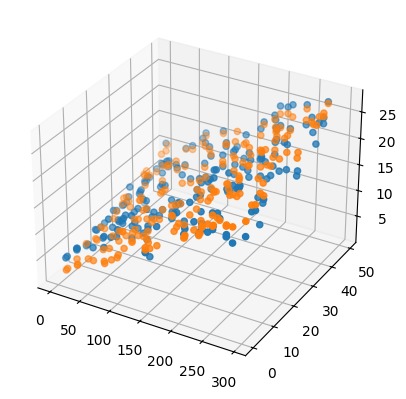

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.scatter(X[:,0], X[:,1], predictions)

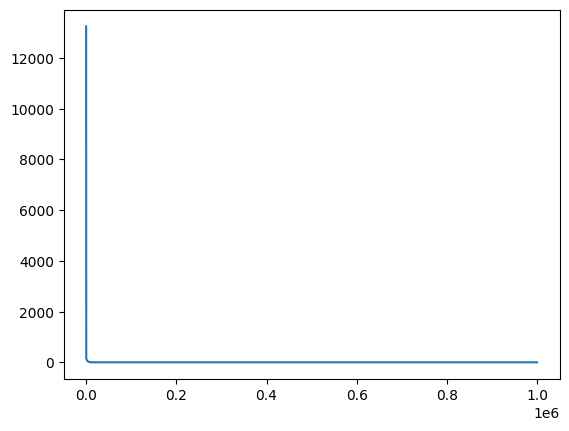

In [16]:
# affiche les noms des axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
plt.plot(range(n_iterations), cost_history)
plt.show()

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination(y, predictions)

0.8542892669519422

In [18]:
# Make predictions
predictions  = model(np.hstack((X_test, np.ones((X_test.shape[0], 1)))), theta_final)


In [19]:
# Evaluate the model
r2 = r2_score(y_test, predictions)


In [20]:

# Print the coefficients
coefficients = theta_final[:-1].flatten()
intercept = theta_final[-1]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.06272447 0.14177746 0.01874909]
Intercept: [1.59361724]


In [21]:
# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.8360256582555607


In [22]:
# Display correlation matrix
correlation_matrix = np.corrcoef(X_train[:, :-1], rowvar=False)

In [23]:
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
[[1.         0.07684067]
 [0.07684067 1.        ]]


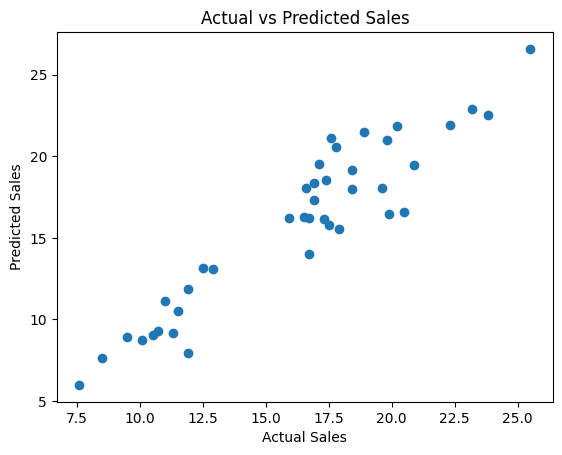

In [24]:
# Plot predictions vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [25]:
#test
# Define the values for TV, Radio, and Newspaper expenditures
TV_expense = 100
Radio_expense = 50
Newspaper_expense = 25

# Create a new data point with these values
new_data_point = np.array([[TV_expense, Radio_expense, Newspaper_expense]])

# Add a bias term to the new data point
new_data_point_with_bias = np.hstack((new_data_point, np.ones((new_data_point.shape[0], 1))))

# Make prediction using the trained model
predicted_sales = model(new_data_point_with_bias, theta_final)

# Print the predicted sales
print("Predicted Sales:", predicted_sales[0][0])


Predicted Sales: 15.423664614125874


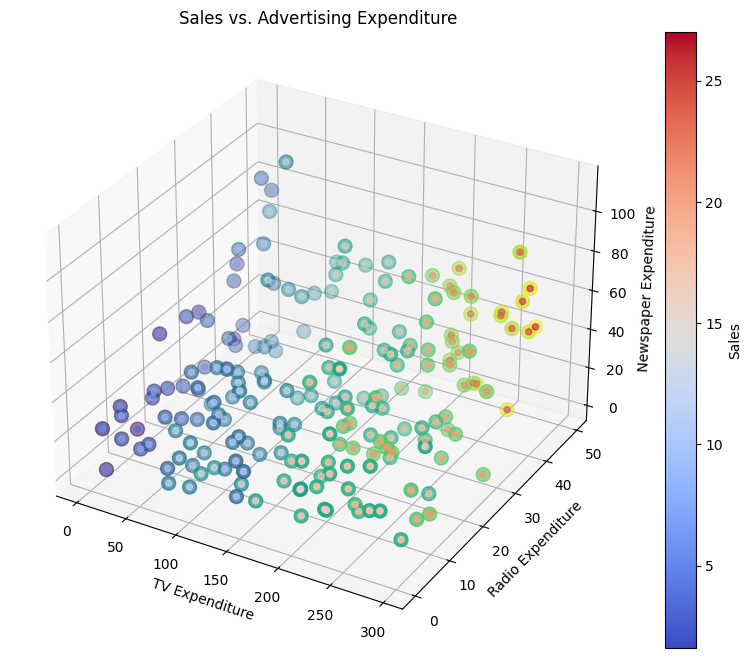

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for TV, Radio, Newspaper vs. Sales
ax.scatter(data['TV'], data['Radio'], data['Newspaper'], c=data['Sales'], cmap='viridis', s=100)

# Set labels and title
ax.set_xlabel('TV Expenditure')
ax.set_ylabel('Radio Expenditure')
ax.set_zlabel('Newspaper Expenditure')
ax.set_title('Sales vs. Advertising Expenditure')

# Add a color bar
cbar = plt.colorbar(ax.scatter(data['TV'], data['Radio'], data['Newspaper'], c=data['Sales'], cmap='coolwarm'))
cbar.set_label('Sales')

plt.show()


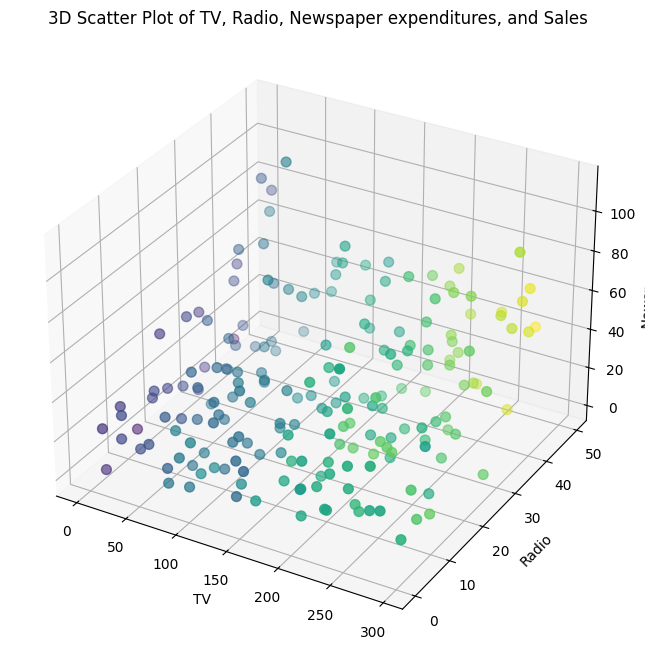

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv("Advertising.csv")

# Extract features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)

# Set labels and title
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
ax.set_title('3D Scatter Plot of TV, Radio, Newspaper expenditures, and Sales')

# Show plot
plt.show()


In [30]:
pip install mplcursors


     ---------------------------------------- 88.8/88.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20745 sha256=a31af5d72d09cba7bce429b7b71d36a0319e08bea1e6cc3b04df5b689e58acbb
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\d7\42\7f\eb3864e9b63853eed4ffdfcdbec3716f263080b0a4b0d1753a
Successfully built mplcursors
Note: you may need to restart the kernel to use updated packages.


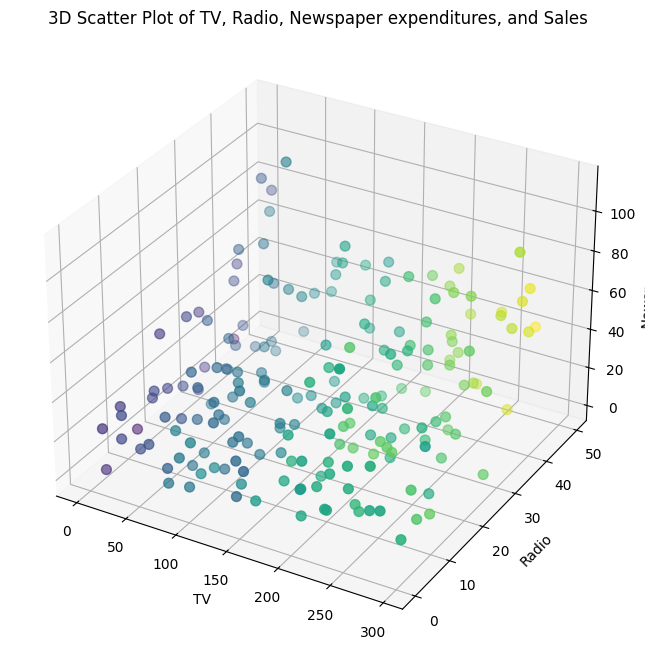

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplcursors
import pandas as pd

# Load the dataset
data = pd.read_csv("Advertising.csv")

# Extract features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)

# Set labels and title
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
ax.set_title('3D Scatter Plot of TV, Radio, Newspaper expenditures, and Sales')

# Add annotations
mplcursors.cursor(hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Sales: {y[sel.target.index]:.2f}")
)

# Show plot
plt.show()
